## Libraries for Data Wrangling, Statistics, and Data Visualization

In [1]:
import pyreadr as pr
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from scipy.stats import skew, kurtosis, pearsonr 
import statistics # for computing the mode of a variable
import platform   # to print the version of Python and selected libraries
import openpyxl
import pyreadstat
import matplotlib.image as mpimg

# imputation data
import miceforest as mf
from pyampute.exploration.mcar_statistical_tests import MCARTest

# Libraries for Machine Learning
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.metrics import r2_score, make_scorer, mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import shap
from skopt import BayesSearchCV # for Bayesian Optimization
from skopt.space import Real, Categorical, Integer
import xgboost as xgb
from xgboost import XGBRegressor
from joblib import dump,load
from sklearn.preprocessing import OneHotEncoder


# import Custom Functions from function.py
from function import *
from ML_function import *

C:\Users\simon\miniconda3\envs\SSES\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Filter Variable
1 = "Younger cohort"   2 = "Older cohort"   1 = "Female"   2 = "Male"


In [2]:
# GENDER and COHORT                  1 = "Younger cohort" 2 = "Older cohort" 1 = "Female" 2 = "Male"
F10 = '10 y/o Females'
M10 = '10 y/o Males'
F15 = '15 y/o Females'
M15 = '15 y/o Males'

# Set seed

In [3]:
np.random.seed(1234)

# Preprocessing 

## Load and Wrangle Dataset


In [4]:
data, meta = pyreadstat.read_sav('../02a_jupyter/01_data/SSES.sav')

# Filter rows based on CohortID '1' or '2' and Gender_Std 1 or 2 
print(data.info())
data = data[(data['CohortID'] == '1') | (data['CohortID'] == '2')]
data = data[(data['Gender_Std'] == 1) | (data['Gender_Std'] == 2)]

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61010 entries, 0 to 61009
Columns: 415 entries, FullID to STQM01503
dtypes: float64(403), object(12)
memory usage: 193.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 60498 entries, 0 to 61009
Columns: 415 entries, FullID to STQM01503
dtypes: float64(403), object(12)
memory usage: 192.0+ MB
None


## Create composite scores

In [5]:
# Reverse the item because the questions are negative to align the score with other relationship variables
data['STQM03001'] = data['STQM03001'].apply(reverse_scale)
data['STQM03002'] = data['STQM03002'].apply(reverse_scale)
data['STQM03003'] = data['STQM03003'].apply(reverse_scale)

In [6]:
Loneliness = ["STQM03701", "STQM03704", "STQM03706"]
Parent_rel = ["STQM03001", "STQM03002", "STQM03003"]
Friend_rel = ["STQM03101", "STQM03102", "STQM03103", "STQM03104"]
Teacher_rel = ["STQM04101", "STQM04102", "STQM04103"]
Bullyng = ["STQM03901", "STQM03902", "STQM03903", "STQM03904"]
Conscie = ["SEL_WLE_ADJ", "RES_WLE_ADJ", "PER_WLE_ADJ"]
Neuroticism = ["STR_WLE_ADJ", "OPT_WLE_ADJ", "EMO_WLE_ADJ"]
Agreeableness = ["EMP_WLE_ADJ", "TRU_WLE_ADJ", "COO_WLE_ADJ"]
Openness = ["TOL_WLE_ADJ", "CUR_WLE_ADJ", "CRE_WLE_ADJ"]
Extroversion = ["SOC_WLE_ADJ", "ASS_WLE_ADJ", "ENE_WLE_ADJ"]
Screen_Time = ["STQM03606", "STQM03608", "STQM03607", "STQM03609", "STQM03610"]


data['Loneliness'] = data[Loneliness].mean(axis=1)
data['Parent_rel'] = data[Parent_rel].mean(axis=1)
data['Friend_rel'] = data[Friend_rel].mean(axis=1)
data['Teacher_rel'] = data[Teacher_rel].mean(axis=1)
data['Bullyng'] = data[Bullyng].mean(axis=1)
data['Task_Perf'] = data[Conscie].mean(axis=1)
data['Emotion_reg'] = data[Neuroticism].mean(axis=1)
data['Collaboration'] = data[Agreeableness].mean(axis=1)
data['Open-mind'] = data[Openness].mean(axis=1)
data['Engaging_oth'] = data[Extroversion].mean(axis=1)
data['Screen_Time'] = data[Screen_Time].mean(axis=1)


## Reliability

In [7]:
# Reliability -------------------------------------------------------

Reliability_data = pd.DataFrame(
    {# Features
    'Parent_rel ': [extractReliab(items=data[["STQM03001", "STQM03002", "STQM03003"]])],
    'Friend_rel ': [extractReliab(items=data[["STQM03101", "STQM03102", "STQM03103", "STQM03104"]])],
    'Teacher_rel  ': [extractReliab(items=data[["STQM04101", "STQM04102", "STQM04103"]])],
    'Bullyng': [extractReliab(items=data[["STQM03901", "STQM03902", "STQM03903", "STQM03904"]])],
    'Task_Perf': [extractReliab(items=data[["SEL_WLE_ADJ", "RES_WLE_ADJ", "PER_WLE_ADJ"]])],
    'Emotion_reg': [extractReliab(items=data[["STR_WLE_ADJ", "OPT_WLE_ADJ", "EMO_WLE_ADJ"]])],
    'Collaboration ': [extractReliab(items=data[["EMP_WLE_ADJ", "TRU_WLE_ADJ", "COO_WLE_ADJ"]])],
    'Open-mind': [extractReliab(items=data[["TOL_WLE_ADJ", "CUR_WLE_ADJ", "CRE_WLE_ADJ"]])],
    'Engaging_oth': [extractReliab(items=data[["SOC_WLE_ADJ", "ASS_WLE_ADJ", "ENE_WLE_ADJ"]])],
    'Screen_Time   ': [extractReliab(items=data[["STQM03606", "STQM03608", "STQM03607", "STQM03609", "STQM03610"]])],
    
     # Loneliness   
     'Loneliness': [extractReliab(items=data[["STQM03701", "STQM03704", "STQM03706"]])],
    
        }
    ).melt().rename(columns={"variable": "Variable", "value":  r'Cronbach $\alpha$'})
Reliability_data.to_excel('../02a_jupyter/04_General/Reliability_data.xlsx', index=False)
Reliability_data

,Variable,Cronbach $\alpha$
0,Parent_rel,0.73
1,Friend_rel,0.86
2,Teacher_rel,0.75
3,Bullyng,0.77
4,Task_Perf,0.83
5,Emotion_reg,0.74
6,Collaboration,0.74
7,Open-mind,0.74
8,Engaging_oth,0.62
9,Screen_Time,0.76


## Rename variables 

In [8]:
data = data.rename(
    columns={
        "STQM03301":"Class_friendly",
        "STB014":"Class_part"})
        

## Select variables

In [9]:
variable_all =['SiteID',
               'CohortID',
               'Gender_Std',
               'Loneliness',
               'Parent_rel',
               'Friend_rel',
               'Teacher_rel',
               'Bullyng',
               'Task_Perf',
               'Emotion_reg',
               'Collaboration',
               'Open-mind',
               'Engaging_oth',
               'Screen_Time',
               'Class_friendly',
               'Class_part'
              ]


# Create a data with the interest variable
data = data[variable_all]
data_var = data.iloc[:, 3:]
tot_row = data_var.shape[0] 


## Data Imputation 

### Drop NaN and number and per cent of missing cases

In [10]:
data_NaN = data_var.dropna() 
data_NaN.shape
# Calculate the number of missing values per column
nan_count = data_var.isna().sum()

# Create a DataFrame with the results
nan_count = nan_count.reset_index()
nan_count.columns = ['Variable', 'Missing case']

# Add the missing percentage column
nan_count['Missing per cent'] = ((nan_count['Missing case'] / tot_row) * 100).round(2).astype(str) + '%'

# save
nan_count.to_excel('./04_General/Number and per cent of missing cases.xlsx', index=False)

# Display the result
nan_count


,Variable,Missing case,Missing per cent
0,Loneliness,2320,3.83%
1,Parent_rel,1492,2.47%
2,Friend_rel,1503,2.48%
3,Teacher_rel,2739,4.53%
4,Bullyng,2558,4.23%
5,Task_Perf,187,0.31%
6,Emotion_reg,187,0.31%
7,Collaboration,188,0.31%
8,Open-mind,187,0.31%
9,Engaging_oth,187,0.31%


### Descriptive data without NaN

In [11]:
data_NaN = calculate_statistics(data_NaN)
data_NaN

,Variable,N,Mean,SD,Median,Min,Max,Skewness,Kurtosis
0,Loneliness,57132,1.77,0.66,1.67,1.00,4.00,0.80,0.51
1,Parent_rel,57132,3.33,0.67,3.33,1.00,4.00,-1.18,1.28
2,Friend_rel,57132,3.16,0.70,3.25,1.00,4.00,-0.69,-0.02
3,Teacher_rel,57132,3.27,0.77,3.50,1.00,4.00,-0.97,0.14
4,Bullyng,57132,1.39,0.57,1.25,1.00,4.00,2.07,4.62
5,Task_Perf,57132,582.42,81.72,572.15,215.86,886.02,0.78,1.13
6,Emotion_reg,57132,541.64,80.36,538.24,93.02,944.72,0.44,2.34
7,Collaboration,57132,588.21,76.80,577.50,219.50,912.78,0.83,1.28
8,Open-mind,57132,602.39,79.10,590.02,270.61,911.84,0.80,0.83
9,Engaging_oth,57132,552.52,73.74,544.82,150.19,890.45,0.58,1.45


### Imputation data

In [12]:
mt = MCARTest(method="ttest")
tt =mt.mcar_t_tests(data.iloc[:, 3:]).round(4)
tt

C:\Users\simon\miniconda3\envs\SSES\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\simon\miniconda3\envs\SSES\Lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,Loneliness,Parent_rel,Friend_rel,Teacher_rel,Bullyng,Task_Perf,Emotion_reg,Collaboration,Open-mind,Engaging_oth,Screen_Time,Class_friendly,Class_part
Loneliness,NaN,0.4438,0.8859,0.0550,0.0000,0.0,0.2344,0.0,0.0,0.0000,0.0205,0.0012,0.0000
Parent_rel,0.0581,NaN,0.7684,0.0157,0.0003,0.0,0.2336,0.0,0.0,0.0000,0.0304,0.0010,0.0000
Friend_rel,0.0008,0.0337,NaN,0.0025,0.0003,0.0,0.0759,0.0,0.0,0.0000,0.0648,0.0000,0.0000
Teacher_rel,0.0000,0.0534,0.1477,NaN,0.0304,0.0,0.8016,0.0,0.0,0.0000,0.4557,0.0041,0.0000
Bullyng,0.0000,0.2887,0.1151,0.0194,NaN,0.0,0.4772,0.0,0.0,0.0000,0.0615,0.0001,0.0000
Task_Perf,0.0209,0.0129,0.6319,0.0016,0.0001,NaN,NaN,NaN,NaN,NaN,0.3302,0.5052,0.6572
Emotion_reg,0.0209,0.0129,0.6319,0.0016,0.0001,NaN,NaN,NaN,NaN,NaN,0.3302,0.5052,0.6572
Collaboration,0.0218,0.0167,0.6164,0.0024,0.0001,NaN,NaN,NaN,NaN,NaN,0.3678,0.4643,0.6898
Open-mind,0.0209,0.0129,0.6319,0.0016,0.0001,NaN,NaN,NaN,NaN,NaN,0.3302,0.5052,0.6572
Engaging_oth,0.0209,0.0129,0.6319,0.0016,0.0001,NaN,NaN,NaN,NaN,NaN,0.3302,0.5052,0.6572


In [13]:
kernel = mf.ImputationKernel(
    data.iloc[:, 3:],  
    save_all_iterations=True,
    random_state=1991
)

# Perform MICE imputation
kernel.mice(20)

# Retrieve the imputed dataset
df = kernel.complete_data()

# Combine DBN column with imputed data
data = pd.concat([data[['SiteID', 'CohortID','Gender_Std']], df], axis=1)

In [14]:
desc_whole1 = calculate_statistics(data.iloc[:, 3:])
desc_whole1

,Variable,N,Mean,SD,Median,Min,Max,Skewness,Kurtosis
0,Loneliness,60498,1.78,0.66,1.67,1.00,4.00,0.79,0.51
1,Parent_rel,60498,3.33,0.67,3.33,1.00,4.00,-1.19,1.28
2,Friend_rel,60498,3.16,0.71,3.25,1.00,4.00,-0.69,-0.02
3,Teacher_rel,60498,3.26,0.77,3.33,1.00,4.00,-0.96,0.11
4,Bullyng,60498,1.39,0.58,1.25,1.00,4.00,2.06,4.53
5,Task_Perf,60498,581.66,81.33,571.55,215.86,886.02,0.79,1.16
6,Emotion_reg,60498,541.53,79.80,538.23,93.02,944.72,0.44,2.35
7,Collaboration,60498,587.29,76.47,576.80,219.50,912.78,0.83,1.29
8,Open-mind,60498,601.49,78.75,589.24,270.61,911.84,0.80,0.85
9,Engaging_oth,60498,551.96,73.22,544.29,150.19,890.45,0.59,1.49


## Creation of data divided by cohort and gender

In [17]:
data_F10 = data[(data['CohortID'] == '1') & (data['Gender_Std'] == 1)] # 10y and female
data_M10 = data[(data['CohortID'] == '1') & (data['Gender_Std'] == 2)] # 10y and male
data_F15 = data[(data['CohortID'] == '2') & (data['Gender_Std'] == 1)] # 15y and female
data_M15 = data[(data['CohortID'] == '2') & (data['Gender_Std'] == 2)] # 15y and male


print(data_F10.shape,
      data_M10.shape,
      data_F15.shape,
      data_M15.shape)


(15367, 16) (15542, 16) (15268, 16) (14321, 16)


## Select only features

In [18]:
features_to_select = ['Loneliness', 'Parent_rel','Friend_rel','Teacher_rel','Bullyng','Task_Perf','Emotion_reg','Collaboration',
                      'Open-mind','Engaging_oth','Screen_Time','Class_friendly','Class_part']

features = ['Parent_rel','Friend_rel', 'Teacher_rel', 'Bullyng', 'Task_Perf', 'Emotion_reg', 'Collaboration', 'Open-mind', 
            'Engaging_oth', 'Screen_Time', 'Class_friendly', 'Class_part']


## Datasets

In [19]:
data_fea     = data[features_to_select]          # 'whole sample' 
data_fea_F10 = data_F10[features_to_select]      # '10 y/o Females
data_fea_M10 = data_M10[features_to_select]      # '10 y/o Males'
data_fea_F15 = data_F15[features_to_select]      # '15 y/o Females
data_fea_M15 = data_M15[features_to_select]      # '15 y/o Males'

# Descriptive

## Descriptive for the whole sample

In [20]:
desc_whole = calculate_statistics(data_fea)
desc_whole.to_excel('./02_Whole_sample/descriptive for the whole sample.xlsx', index=False)
desc_whole


,Variable,N,Mean,SD,Median,Min,Max,Skewness,Kurtosis
0,Loneliness,60498,1.78,0.66,1.67,1.00,4.00,0.79,0.51
1,Parent_rel,60498,3.33,0.67,3.33,1.00,4.00,-1.19,1.28
2,Friend_rel,60498,3.16,0.71,3.25,1.00,4.00,-0.69,-0.02
3,Teacher_rel,60498,3.26,0.77,3.33,1.00,4.00,-0.96,0.11
4,Bullyng,60498,1.39,0.58,1.25,1.00,4.00,2.06,4.53
5,Task_Perf,60498,581.66,81.33,571.55,215.86,886.02,0.79,1.16
6,Emotion_reg,60498,541.53,79.80,538.23,93.02,944.72,0.44,2.35
7,Collaboration,60498,587.29,76.47,576.80,219.50,912.78,0.83,1.29
8,Open-mind,60498,601.49,78.75,589.24,270.61,911.84,0.80,0.85
9,Engaging_oth,60498,551.96,73.22,544.29,150.19,890.45,0.59,1.49


## Descriptive by Gender and Cohort

In [21]:
desc_F10 = calculate_statistics(data_fea_F10)
desc_M10 = calculate_statistics(data_fea_M10)
desc_F15 = calculate_statistics(data_fea_F15)
desc_M15 = calculate_statistics(data_fea_M15)

# Assuming data_fea_11, data_fea_12, data_fea_21, data_fea_22 are already defined
desc_F10['Sample'] = F10
desc_M10['Sample'] = M10
desc_F15['Sample'] = F15
desc_M15['Sample'] = M15

# Concatenate the dataframes
merged_df = pd.concat([desc_F10, desc_M10, desc_F15, desc_M15], ignore_index=True)

# Move 'df_name' column to the first position
cols = merged_df.columns.tolist()
cols = ['Sample'] + [col for col in cols if col != 'Sample']
merged_df = merged_df[cols]

merged_df.iloc[1:13, 0] = ''
merged_df.iloc[14:26, 0] = ''
merged_df.iloc[27:39, 0] = ''
merged_df.iloc[40:52, 0] = ''

merged_df.to_excel('./03_Gender_and_Cohort/descriptive by Gender and Cohort.xlsx', index=False)
# Display the merged dataframe
merged_df


,Sample,Variable,N,Mean,SD,Median,Min,Max,Skewness,Kurtosis
0,10 y/o Females,Loneliness,15367,1.72,0.68,1.67,1.00,4.00,0.92,0.62
1,,Parent_rel,15367,3.45,0.63,3.67,1.00,4.00,-1.47,2.29
2,,Friend_rel,15367,3.23,0.74,3.25,1.00,4.00,-0.85,0.08
3,,Teacher_rel,15367,3.31,0.79,3.67,1.00,4.00,-1.04,0.17
4,,Bullyng,15367,1.41,0.60,1.25,1.00,4.00,1.96,3.90
5,,Task_Perf,15367,598.66,87.97,586.65,215.86,885.33,0.66,0.66
6,,Emotion_reg,15367,553.09,82.60,548.10,93.02,937.78,0.49,2.13
7,,Collaboration,15367,605.76,82.73,593.76,295.61,912.78,0.70,0.56
8,,Open-mind,15367,613.76,82.96,601.02,291.70,911.84,0.71,0.50
9,,Engaging_oth,15367,561.26,73.62,551.82,238.09,890.45,0.66,1.21


# Correlations

## Correlation matrix for the whole sample

##### corr_matrix(data_fea, my_dpi=125)
plt.title(f'Correlation matrix for the whole sample ($\\it{{N}}$ = {data_fea.shape[0]})' )
plt.savefig('../ML_SSES_2024/02_Whole_sample/Correlation matrix for the whole sample.png', dpi=300,bbox_inches='tight')

## Correlation Matrices by Gender and Cohort

In [22]:
%%capture
corr_F10 = corr_matrix(data_fea_F10, my_dpi=300)
plt.title(f'{F10} ($\\it{{N}}$ = {data_fea_F10.shape[0]})' )

corr_M10 = corr_matrix(data_fea_M10, my_dpi=300)
plt.title(f'{M10} ($\\it{{N}}$ = {data_fea_M10.shape[0]})' )

corr_F15 = corr_matrix(data_fea_F15, my_dpi=300)
plt.title(f'{F15} ($\\it{{N}}$ = {data_fea_F15.shape[0]})' )

corr_M15 = corr_matrix(data_fea_M15, my_dpi=300)
plt.title(f'{M15} ($\\it{{N}}$ = {data_fea_M15.shape[0]})' )


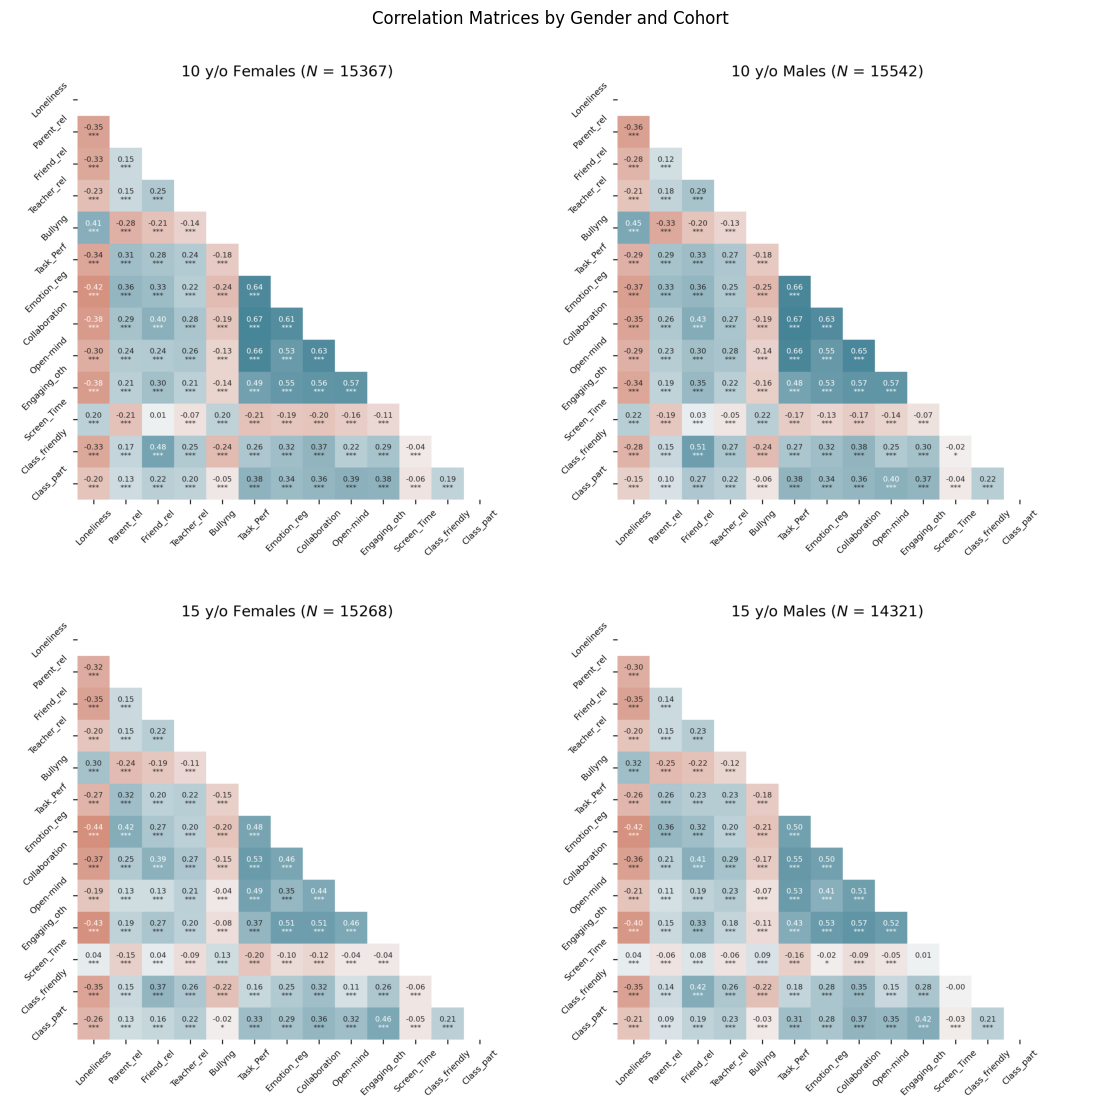

In [21]:

# Extract the Axes objects from each correlation matrix
ax1 = corr_F10.axes[0]
ax2 = corr_M10.axes[0]
ax3 = corr_F15.axes[0]
ax4 = corr_M15.axes[0]

# Create a new figure with a 2x2 layout
fig_merged = plt.figure(figsize=(12,12))

# Define the positions for the 2x2 grid
positions = [
    [0, 0.45, 0.45, 0.45],   # Top left
    [0.45, 0.45, 0.45, 0.45], # Top right
    [0, 0, 0.45, 0.45],     # Bottom left
    [0.45, 0, 0.45, 0.45]    # Bottom right
]

# Add each correlation matrix to the figure
add_corr_to_figure(ax1, positions[0], fig_merged)
add_corr_to_figure(ax2, positions[1], fig_merged)
add_corr_to_figure(ax3, positions[2], fig_merged)
add_corr_to_figure(ax4, positions[3], fig_merged)

# Adjust the spacing between subplots
fig_merged.subplots_adjust(wspace= 0, hspace=0)

fig_merged.text(0.45, 0.9, 'Correlation Matrices by Gender and Cohort', ha='center', va='center', fontsize=12)
# Export the figure in .png with 300 dpi
plt.savefig('./03_Gender_and_Cohort/Correlation Matrices by Gender and Cohort.png', dpi=300,bbox_inches='tight') # remove unnecessary blank space above and below the figure
fig_merged.subplots_adjust(hspace=1)
# Display the merged Figure

plt.show()


# ML by Gender and Cohort

## Set Hyperparameters

In [23]:
# Hyperparameters for eNet

elastic_r_parameter = {
                        'alpha': [0.01, 0.025, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.07, 0.10,
                                  0.15, 0.20, 0.30, 0.40, 0.50, 0.60, 0.80, 1.0, 5.0, 10.0, 25.0,
                                  50.0, 75.0, 100.0],
                        'l1_ratio': [0.25, 0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 1]  # l1_ratio = 1 -> LASSO, l1_ratio = 0 -> Ridge
                      }

# Hyperparameters for Random forests

param_space = {
               'bootstrap': [True, False],
               'n_estimators': np.arange(100, 1001), #change for speady
               'max_depth': np.arange(1, 11),
               'min_samples_split': np.arange(2, 11),
               'min_samples_leaf': np.arange(1, 21),
               'max_features': ['sqrt', 'log2', None]
              }

# Hyperparameters for XGBoost

search_spaces = {
                 'learning_rate':     Real(0.001, 0.1, 'log-uniform'),  
                 'n_estimators':      Integer(100,1001),  #change for speady              
                 'max_depth':         Integer(3, 10),                      
                 'min_child_weight':  Integer(1, 10),               
                 'subsample':         Real(0.5, 1.0, 'uniform'),           
                 'colsample_bytree':  Real(0.5, 1.0, 'uniform'),    
                 'colsample_bylevel': Real(0.5, 1.0, 'uniform'),   
                 'gamma':             Real(0.0, 0.5, 'uniform'),               
                 'reg_lambda':        Real(0.01, 5.0, 'uniform'),         
                 'reg_alpha':         Real(0.0, 1.0, 'uniform')
                 } 

## Create a path for save print

In [24]:
dir_F10    = './03_Gender_and_Cohort/01_F10/'
dir_M10    = './03_Gender_and_Cohort/02_M10/'
dir_F15    = './03_Gender_and_Cohort/03_F15/'
dir_M15    = './03_Gender_and_Cohort/04_M15/'
dir_whole  = './02_Whole_sample/'

## Train & Test Data and Normalization with function in ML_function.py

In [25]:
F10X_train, F10X_test, F10y_train, F10y_test = Train_Test_normal(data_fea_F10,1000000,13)    # '10 y/o Females'      set 100'000 second param for all sample   
M10X_train, M10X_test, M10y_train, M10y_test = Train_Test_normal(data_fea_M10,1000000,13)    # '10 y/o Males'        set 100'000 second param for all sample  
F15X_train, F15X_test, F15y_train, F15y_test = Train_Test_normal(data_fea_F15,1000000,13)    # '15 y/o Females'      set 100'000 second param for all sample 
M15X_train, M15X_test, M15y_train, M15y_test = Train_Test_normal(data_fea_M15,1000000,13)    # '15 y/o Males'        set 100'000 second param for all sample 


Input shape: (15367, 12)
Output shape: (15367,)
(11525, 12)
(3842, 12)
(11525,)
(3842,)
----------------------------------------
Input shape: (15542, 12)
Output shape: (15542,)
(11656, 12)
(3886, 12)
(11656,)
(3886,)
----------------------------------------
Input shape: (15268, 12)
Output shape: (15268,)
(11451, 12)
(3817, 12)
(11451,)
(3817,)
----------------------------------------
Input shape: (14321, 12)
Output shape: (14321,)
(10740, 12)
(3581, 12)
(10740,)
(3581,)
----------------------------------------


## eNet 

In [ ]:
ove_1 = eNET_function(elastic_r_parameter,F10X_train, F10X_test, F10y_train, F10y_test, features, dir_F10)


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [ ]:
ove_2 = eNET_function(elastic_r_parameter,M10X_train, M10X_test, M10y_train, M10y_test, features, dir_M10)


In [ ]:
ove_3 = eNET_function(elastic_r_parameter,F15X_train, F15X_test, F15y_train, F15y_test, features, dir_F15)


In [ ]:
ove_4 = eNET_function(elastic_r_parameter,M15X_train, M15X_test, M15y_train, M15y_test, features, dir_M15)


## Random Forests Regression 

In [ ]:
ove_6 = rf_function(param_space,F10X_train, F10X_test, F10y_train, F10y_test, features, dir_F10)


In [ ]:
ove_7 = rf_function(param_space,M10X_train, M10X_test, M10y_train, M10y_test, features, dir_M10)


In [ ]:
ove_8 = rf_function(param_space,F15X_train, F15X_test, F15y_train, F15y_test, features, dir_F15)


In [ ]:
ove_9 = rf_function(param_space,M15X_train, M15X_test, M15y_train, M15y_test, features, dir_M15)


## XGBoost Regressor 

In [ ]:
ove_11 = ove1 = XGB_function(search_spaces,F10X_train, F10X_test, F10y_train, F10y_test, features, dir_F10)


In [ ]:
ove_12 = ove2 = XGB_function(search_spaces,M10X_train, M10X_test, M10y_train, M10y_test, features, dir_M10)


In [ ]:
ove_13 = ove3 = XGB_function(search_spaces,F15X_train, F15X_test, F15y_train, F15y_test, features, dir_F15)


In [ ]:
ove_14 = ove4 = XGB_function(search_spaces,M15X_train, M15X_test, M15y_train, M15y_test, features, dir_M15)


# Plot feature importance

In [ ]:
# Paths to the images
img_paths = [
    f'{dir_F10}/Feature_importance.png',
    f'{dir_F10}/Feature_importante(Random_Forests).png',
    f'{dir_F10}/Feature_importante(XGBoost).png',
    f'{dir_M10}/Feature_importance.png',
    f'{dir_M10}/Feature_importante(Random_Forests).png',
    f'{dir_M10}/Feature_importante(XGBoost).png',
    f'{dir_F15}/Feature_importance.png',
    f'{dir_F15}/Feature_importante(Random_Forests).png',
    f'{dir_F15}/Feature_importante(XGBoost).png',
    f'{dir_M15}/Feature_importance.png',
    f'{dir_M15}/Feature_importante(Random_Forests).png',
    f'{dir_M15}/Feature_importante(XGBoost).png',
    
    ]

# Labels for each row
row_labels = [
    '10 y/o Females',
    '10 y/o Males',
    '15 y/o Females',
    '15 y/o Males'
]

# Read the images
images = [mpimg.imread(path) for path in img_paths]

# Create a figure with 5 rows and 3 columns of subplots
fig, axes = plt.subplots(4, 3, figsize=(50, 45))

# Display each image
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')  # Hide axes

for i, label in enumerate(row_labels):
    fig.text(0.04, 1.025 - (i + 0.5) / 4, label, ha='center', va='center', fontsize=35, rotation='vertical')
fig.text(0.22, 1.001, 'Elastic Net', ha='center', va='center', fontsize=35)
fig.text(0.53, 1.001, 'Random Forests', ha='center', va='center', fontsize=35)
fig.text(0.84, 1.001, 'XGBoost', ha='center', va='center', fontsize=35)
    
# Adjust layout and save the figure
plt.subplots_adjust(hspace=0.1)
# plt.subplots_adjust(vspace=0.5)
plt.tight_layout(rect=[0.03, 0, 1, 1])  # Adjust layout to make space for row labels
plt.savefig('./04_General/feature_importance_result.png', dpi=300, bbox_inches='tight')
plt.show()


# Plot shap

In [ ]:
# Paths to the images
img_paths = [
    f'{dir_F10}/Shap_(Random_Forests).png',
    f'{dir_F10}/Shap_(XGBoost).png',
    f'{dir_M10}/Shap_(Random_Forests).png',
    f'{dir_M10}/Shap_(XGBoost).png',
    f'{dir_F15}/Shap_(Random_Forests).png',
    f'{dir_F15}/Shap_(XGBoost).png',
    f'{dir_M15}/Shap_(Random_Forests).png',
    f'{dir_M15}/Shap_(XGBoost).png',
   
    ]
# Labels for each row
row_labels = [
    '10 y/o Females',
    '10 y/o Males',
    '15 y/o Females',
    '15 y/o Males'
]

# Read the images
images = [mpimg.imread(path) for path in img_paths]

# Create a figure with 5 rows and 3 columns of subplots
fig, axes = plt.subplots(4, 2, figsize=(50, 80))

# Display each image
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')  # Hide axes

# Add row labels
for i, label in enumerate(row_labels):
    fig.text(0.04, 1 - (i + 0.5) / 4, label, ha='center', va='center', fontsize=35, rotation='vertical')
    
fig.text(0.25, 1.01, 'Random Forests', ha='center', va='center', fontsize=35)
fig.text(0.75, 1.01, 'XGBoost', ha='center', va='center', fontsize=35)

# Adjust layout and save the figure
plt.subplots_adjust(hspace=0.5)  # Adjust the height space between plots
plt.tight_layout(rect=[0.03, 0, 1, 1])  # Adjust layout to make space for row labels

# Show the figure
plt.savefig('./04_General/shap_result.png', dpi=300,bbox_inches='tight') # remove unnecessary blank space above and below the figure
plt.subplots_adjust(hspace=1)
plt.tight_layout()
plt.show()


# Performance Metrics

In [ ]:
# Add the sample name as a new column

ove_1['Sample'],ove_6['Sample'],ove_11['Sample']  = F10,F10,F10
ove_2['Sample'],ove_7['Sample'],ove_12['Sample']  = M10,M10,M10
ove_3['Sample'],ove_8['Sample'],ove_13['Sample']  = F15,F15,F15
ove_4['Sample'],ove_9['Sample'],ove_14['Sample']  = M15,M15,M15
# ove_5['Sample'],ove_10['Sample'],ove_15['Sample'] = 'Whole','Whole','Whole'
# Concatenate the DataFrames
dfs = [ove_1,ove_6,ove_11,ove_2,ove_7,ove_12,ove_3,ove_8,ove_13,ove_4,ove_9,ove_14] # ove_5,ove_10,ove_15
combined_df = pd.concat(dfs, ignore_index=True)
combined_df = combined_df[[ 'Sample', 'Alghorithm', 'Partition', 'R^2', 'MAE', 'MAE Median', 'MAE CI 5%','MAE CI 95%', 'R^2 Median',  'R^2 CI 5%', 'R^2 CI 95%']]
for i in range(1, 30, 6):
    combined_df.iloc[i:i+5, 0] = ''

# For the second column
for i in range(1, 30, 2):
    if i % 6 != 0:
        combined_df.iloc[i:i+1, 1] = ''
combined_df['Alghorithm'] = combined_df['Alghorithm'].replace('xgb', 'XGBoost')
combined_df = combined_df.round(3)
# Combine 'R^2', 'MAE', 'MAE Median' into a single column
combined_df['Bootstrap R^2 [95% CI]'] = combined_df.apply(lambda row: f"{row['R^2 Median']:.3f} [ {row['R^2 CI 5%']:.3f}, {row['R^2 CI 95%']:.3f}]", axis=1)
combined_df['Bootstrap MAE [95% CI]'] = combined_df.apply(lambda row: f"{row['MAE Median']:.3f} [ {row['MAE CI 5%']:.3f}, {row['MAE CI 95%']:.3f}]", axis=1)
# Drop the original columns
combined_df = combined_df.drop(['R^2 Median', 'MAE Median', 'MAE Median','MAE CI 5%','R^2 CI 5%','R^2 CI 95%','MAE CI 95%'], axis=1)
combined_df.to_excel('./04_General/Performance Metrics.xlsx', index=False)
combined_df